In [444]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [445]:
df = pd.read_csv("data.csv")

In [446]:
df

,A,B,C,D
0,10.07,2.18,3.0,0.8
1,10.00,2.20,3.0,0.7
2,9.95,2.21,3.0,0.9
3,9.93,2.30,2.5,1.1
4,9.88,2.30,2.5,0.9
...,...,...,...,...
223,8.98,3.00,0.0,1.5
224,8.91,3.10,0.0,1.6
225,8.80,3.20,0.0,1.4
226,8.73,3.10,0.0,1.5


In [447]:
target = df["D"].copy()
df["D"] = target.shift(1,fill_value=target[0])


In [448]:
df

,A,B,C,D
0,10.07,2.18,3.0,0.8
1,10.00,2.20,3.0,0.8
2,9.95,2.21,3.0,0.7
3,9.93,2.30,2.5,0.9
4,9.88,2.30,2.5,1.1
...,...,...,...,...
223,8.98,3.00,0.0,1.3
224,8.91,3.10,0.0,1.5
225,8.80,3.20,0.0,1.6
226,8.73,3.10,0.0,1.4


In [449]:
for index, columns in enumerate(["A", "B", "C", "D"]):
    for i in range(len(df)):
        fill_value = df[columns].iloc[0]
        df[f"{columns}_Lag_{i}"] = df[columns].shift(i, fill_value=fill_value)


C:\Users\Sam\AppData\Local\Temp/ipykernel_23440/3033583746.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{columns}_Lag_{i}"] = df[columns].shift(i, fill_value=fill_value)


In [450]:
target

0      0.8
1      0.7
2      0.9
3      1.1
4      0.9
      ... 
223    1.5
224    1.6
225    1.4
226    1.5
227    1.3
Name: D, Length: 228, dtype: float64

In [451]:
df.drop(["A","B","C","D"],axis=1,inplace=True)

In [452]:
df.isnull().sum().sum()

0

In [454]:
df["D_Lag_0"]

0      0.8
1      0.8
2      0.7
3      0.9
4      1.1
      ... 
223    1.3
224    1.5
225    1.6
226    1.4
227    1.5
Name: D_Lag_0, Length: 228, dtype: float64

In [455]:
target

0      0.8
1      0.7
2      0.9
3      1.1
4      0.9
      ... 
223    1.5
224    1.6
225    1.4
226    1.5
227    1.3
Name: D, Length: 228, dtype: float64

In [456]:
target.isnull().sum().sum()

0

In [457]:
target

0      0.8
1      0.7
2      0.9
3      1.1
4      0.9
      ... 
223    1.5
224    1.6
225    1.4
226    1.5
227    1.3
Name: D, Length: 228, dtype: float64

In [458]:
x_train, x_test, y_train, y_test = train_test_split(df,target)

In [459]:
y_test.isnull().sum().sum()

0

# Standard Linear Regression

In [460]:
model = LinearRegression()

In [461]:
model.fit(x_train,y_train)

LinearRegression()

In [462]:
x_test.head(1)

,A_Lag_0,A_Lag_1,A_Lag_2,A_Lag_3,A_Lag_4,A_Lag_5,A_Lag_6,A_Lag_7,A_Lag_8,A_Lag_9,...,D_Lag_218,D_Lag_219,D_Lag_220,D_Lag_221,D_Lag_222,D_Lag_223,D_Lag_224,D_Lag_225,D_Lag_226,D_Lag_227
110,7.29,7.32,7.36,7.39,7.36,7.4,7.45,7.49,7.55,7.5,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [463]:
model.predict(x_test)

array([ 3.06159701,  2.3226295 ,  0.92059256,  2.41917623,  0.03181918,
        2.55681262,  0.4637834 ,  2.00908267,  0.51170805,  3.16017765,
       -1.6986277 ,  0.04608129, -0.16554995,  2.0871481 ,  2.17701424,
        2.47364791,  1.59382877,  2.27306382,  1.95971654,  2.04849119,
        2.14013507,  1.32194701,  3.0427789 ,  3.66156599,  2.21445622,
        1.33357035,  0.9759692 ,  0.04730979,  0.87186965,  2.13972503,
        2.20478043,  2.5940016 ,  2.67831458,  1.57599997,  2.63657839,
        1.88741506,  0.77093158,  2.82271617,  2.91150971,  1.58615704,
        3.62626956,  1.82780448, -0.220197  ,  1.6300261 ,  0.09093249,
        1.78056427,  2.95940293,  1.94246555,  2.3117274 ,  1.90336397,
        1.70958358, -0.25676153,  2.95336596,  2.27610788,  0.88199165,
        0.14365696,  2.34054137])

In [464]:
y_test

110    3.6
38     2.5
183    0.7
73     2.1
210    0.2
88     2.5
201    0.4
79     2.2
193   -0.3
153    3.0
126   -0.6
181    0.7
208   -0.1
18     2.1
23     2.5
138    1.7
52     1.8
219    1.9
14     2.0
72     1.9
162    2.4
221    1.3
58     2.2
113    3.9
59     2.0
224    1.6
134    1.6
132    0.9
135    1.6
96     1.8
100    1.9
165    2.5
80     2.6
220    1.4
89     2.5
102    1.8
214    0.6
154    3.0
157    2.7
173    1.6
115    3.8
218    1.5
209    0.0
139    1.6
204    0.3
50     2.4
108    3.2
78     2.1
53     2.0
98     1.9
69     2.4
187    0.4
105    2.5
39     2.4
6      1.0
185    0.5
216    1.7
Name: D, dtype: float64

In [465]:
r2_score(y_test, model.predict(x_test))

0.8364182929308599

# Regularisation

In [466]:
myalphas = np.logspace(-6, 6, 13)
train_sizes = 150, 10

models = LinearRegression, RidgeCV, LassoCV
model_names = 'linear regression', 'Ridge regression using CV', 'Lasso regression using CV'

for train_size in train_sizes:
    print('Training with this many datapoints: ', train_size)
    for i, model in enumerate(models):
        print('Using regression of type: ', model_names[i])
        if model == LinearRegression:
            reg = model()
        else:
            print('Trying these complexity parameter values (i.e.alphas): ', myalphas)
            reg = model(alphas=myalphas)
        reg.fit(x_train,y_train)

        if model != LinearRegression:
            print('Using cross-validation got this value for the complexity parameter: ', reg.alpha_)
        for i, name in enumerate(["A","B","C","D"]):
            print('Parameter for {0} is {1}'.format(name,reg.coef_[i]))

        print('Error on held out set is: ', reg.score(x_test,y_test))
        print('\n\n')

Training with this many datapoints:  150
Using regression of type:  linear regression
Parameter for A is 1.3819012910868105
Parameter for B is -2.721603260911742
Parameter for C is -0.25023597711297213
Parameter for D is 0.13596871588592963
Error on held out set is:  0.8364182929308599



Using regression of type:  Ridge regression using CV
Trying these complexity parameter values (i.e.alphas):  [1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03
 1.e+04 1.e+05 1.e+06]
Using cross-validation got this value for the complexity parameter:  1.0
Parameter for A is -0.0567198484601481
Parameter for B is -0.061730886501861315
Parameter for C is -0.05033245327089331
Parameter for D is -0.03154957738534536
Error on held out set is:  0.9612201992790324



Using regression of type:  Lasso regression using CV
Trying these complexity parameter values (i.e.alphas):  [1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03
 1.e+04 1.e+05 1.e+06]


G:\anaconda\envs\workspace\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.586e-01, tolerance: 1.016e-02
  model = cd_fast.enet_coordinate_descent(
G:\anaconda\envs\workspace\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.139e-01, tolerance: 1.016e-02
  model = cd_fast.enet_coordinate_descent(
G:\anaconda\envs\workspace\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.185e-02, to

Using cross-validation got this value for the complexity parameter:  0.01
Parameter for A is -0.0
Parameter for B is -0.0
Parameter for C is -0.0
Parameter for D is -0.0
Error on held out set is:  0.9433237330281264



Training with this many datapoints:  10
Using regression of type:  linear regression
Parameter for A is 1.3819012910868105
Parameter for B is -2.721603260911742
Parameter for C is -0.25023597711297213
Parameter for D is 0.13596871588592963
Error on held out set is:  0.8364182929308599



Using regression of type:  Ridge regression using CV
Trying these complexity parameter values (i.e.alphas):  [1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03
 1.e+04 1.e+05 1.e+06]
Using cross-validation got this value for the complexity parameter:  1.0
Parameter for A is -0.0567198484601481
Parameter for B is -0.061730886501861315
Parameter for C is -0.05033245327089331
Parameter for D is -0.03154957738534536
Error on held out set is:  0.9612201992790324



Using r

G:\anaconda\envs\workspace\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.586e-01, tolerance: 1.016e-02
  model = cd_fast.enet_coordinate_descent(
G:\anaconda\envs\workspace\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.139e-01, tolerance: 1.016e-02
  model = cd_fast.enet_coordinate_descent(
G:\anaconda\envs\workspace\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.185e-02, to

Using cross-validation got this value for the complexity parameter:  0.01
Parameter for A is -0.0
Parameter for B is -0.0
Parameter for C is -0.0
Parameter for D is -0.0
Error on held out set is:  0.9433237330281264





G:\anaconda\envs\workspace\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.846e-02, tolerance: 1.166e-02
  model = cd_fast.enet_coordinate_descent(


# Polynomial Regression

In [467]:
df[["A_Lag_0","B_Lag_0","C_Lag_0","D_Lag_0"]]

,A_Lag_0,B_Lag_0,C_Lag_0,D_Lag_0
0,10.07,2.18,3.0,0.8
1,10.00,2.20,3.0,0.8
2,9.95,2.21,3.0,0.7
3,9.93,2.30,2.5,0.9
4,9.88,2.30,2.5,1.1
...,...,...,...,...
223,8.98,3.00,0.0,1.3
224,8.91,3.10,0.0,1.5
225,8.80,3.20,0.0,1.6
226,8.73,3.10,0.0,1.4


In [470]:
x_test[["A_Lag_0","B_Lag_0","C_Lag_0","D_Lag_0"]].head(1)

,A_Lag_0,B_Lag_0,C_Lag_0,D_Lag_0
110,7.29,2.2,4.0,3.3


In [471]:
y_test

110    3.6
38     2.5
183    0.7
73     2.1
210    0.2
88     2.5
201    0.4
79     2.2
193   -0.3
153    3.0
126   -0.6
181    0.7
208   -0.1
18     2.1
23     2.5
138    1.7
52     1.8
219    1.9
14     2.0
72     1.9
162    2.4
221    1.3
58     2.2
113    3.9
59     2.0
224    1.6
134    1.6
132    0.9
135    1.6
96     1.8
100    1.9
165    2.5
80     2.6
220    1.4
89     2.5
102    1.8
214    0.6
154    3.0
157    2.7
173    1.6
115    3.8
218    1.5
209    0.0
139    1.6
204    0.3
50     2.4
108    3.2
78     2.1
53     2.0
98     1.9
69     2.4
187    0.4
105    2.5
39     2.4
6      1.0
185    0.5
216    1.7
Name: D, dtype: float64

In [472]:

# polynomial features

# Pipeline: creates a pipeline of transforms with a final estimator.
model = make_pipeline(PolynomialFeatures(3),Ridge(alpha=0.1))
model.fit(x_train[["A_Lag_0","B_Lag_0","C_Lag_0","D_Lag_0"]], y_train)
y_plot = model.predict(x_test[["A_Lag_0","B_Lag_0","C_Lag_0","D_Lag_0"]])

In [476]:
r2_score(y_test, model.predict(x_test[["A_Lag_0","B_Lag_0","C_Lag_0","D_Lag_0"]]))

0.935316611910581

# Piecewise Regression

In [489]:
max(y_train)

4.1

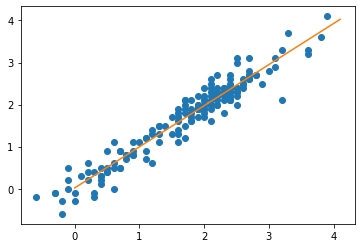

In [492]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array(x_train["D_Lag_0"], dtype=float)
y = np.array(y_train)

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, max(y_train), 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))